# Check correlations

In [1]:
%load_ext autoreload
%autoreload 2

In [47]:
from src.dataset.make_dataset import Dataset
from src.features.build_features import *
from src.model.train_model import *

import impyute as impy
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.options.display.max_columns = None

import numpy as np
import pandas as pd

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [6]:
ds = Dataset()
ds.load_dataset()

## Identity correlation

c:\utilisateurs\a557847\appdata\local\continuum\anaconda3\envs\ieee-fraud-detection\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


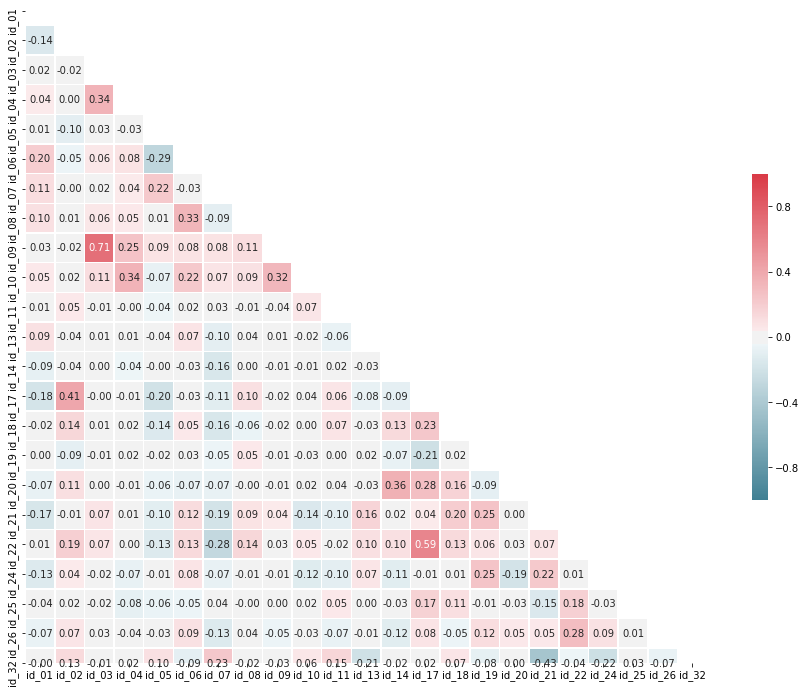

In [35]:
f, ax = plt.subplots(figsize=(16,12))

# Compute the correlation matrix
corr = ds.X_train[ds.identity_cols].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
f.show()